Read img04.tif.
Image size:  (768, 512)
Data type:  uint8


<IPython.core.display.Javascript object>


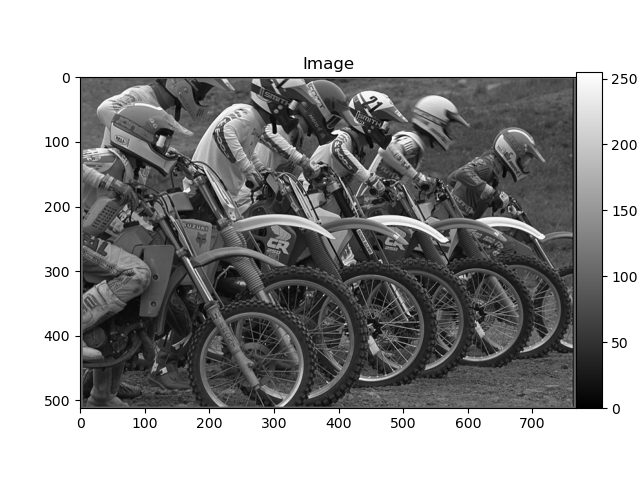

<IPython.core.display.Javascript object>


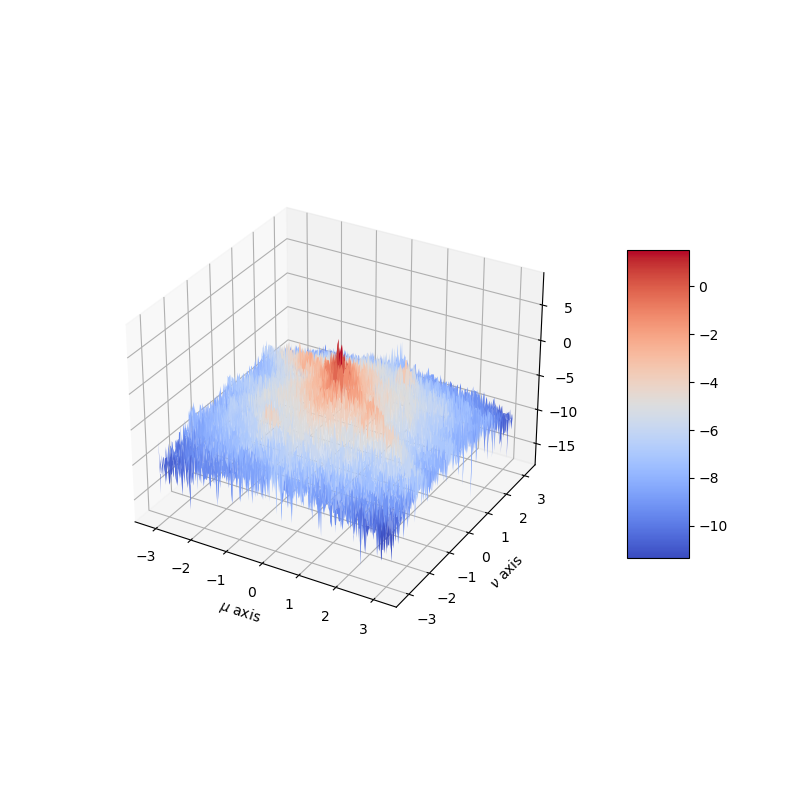

In [16]:
%matplotlib notebook
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 24 18:54:16 2021

@author: Wenrui Li
"""

import numpy as np                 # Numpy is a library support computation of large, multi-dimensional arrays and matrices.
from PIL import Image              # Python Imaging Library (abbreviated as PIL) is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.
import matplotlib.pyplot as plt    # Matplotlib is a plotting library for the Python programming language.

# Read in a gray scale TIFF image.
im = Image.open('img04g.tif')
print('Read img04.tif.')
print('Image size: ', im.size)

# Display image object by PIL.
#im.show(title='image')

# Import Image Data into Numpy array.
# The matrix x contains a 2-D array of 8-bit gray scale values. 
x = np.array(im)
print('Data type: ', x.dtype)

# Display numpy array by matplotlib.
plt.imshow(x, cmap=plt.cm.gray)
plt.title('Image')

# Set colorbar location. [left, bottom, width, height].
cax =plt.axes([0.9, 0.15, 0.04, 0.7]) 
plt.colorbar(cax=cax)
plt.show()

x = np.double(x)/255.0

i = 99
j = 99
N = 256

z = x[i:N+i, j:N+j]

# Compute the power spectrum for the NxN region.
Z = (1/N**2)*np.abs(np.fft.fft2(z))**2

# Use fftshift to move the zero frequencies to the center of the plot.
Z = np.fft.fftshift(Z)

# Compute the logarithm of the Power Spectrum.
Zabs = np.log(Z)

# Plot the result using a 3-D mesh plot and label the x and y axises properly. 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.linspace(-np.pi, np.pi, num = N)
X, Y = np.meshgrid(a, b)

surf = ax.plot_surface(X, Y, Zabs, cmap=plt.cm.coolwarm)

ax.set_xlabel('$\mu$ axis')
ax.set_ylabel('$\\nu$ axis')
#ax.set_zlabel('Z Label')

fig.colorbar(surf, shrink=0.5, aspect=5, pad = 0.1)
fig.set_figwidth(8)
fig.set_figheight(8)

plt.show()

# Jack added - savng figure *******************
# import io
# # Save the image in memory in PNG format
# png1 = io.BytesIO()
# fig.savefig(png1, format="png")

# # Load this image into PIL
# img_out = Image.open(png1)

# # Save as TIFF
# img_out.save("L2Q1_256.tif")
# png1.close()
